In [217]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [200]:

data = pd.read_csv('./Data/ESK7212.csv')
data = pd.DataFrame(data)

data

,Date Time Hour Beginning,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,ILS Usage,Manual Load_Reduction(MLR),IOS Excl ILS and MLR,...,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout
2019-04-01 12:00:00 AM,19988.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,500.0,21.78,4075.73,44104.0,5246.00,10828.725,766.4,11595.0,125.0,1632.0
2019-04-01 01:00:00 AM,19670.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,500.0,21.78,4075.73,44104.0,5246.00,10663.279,765.0,11428.0,279.0,1517.0
2019-04-01 02:00:00 AM,19597.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,500.0,21.78,4075.73,44104.0,5199.95,10504.001,765.0,11269.0,1.0,1496.0
2019-04-01 03:00:00 AM,19675.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,500.0,21.78,4075.73,44104.0,4939.00,10434.095,765.0,11199.0,95.0,1494.0
2019-04-01 04:00:00 AM,19871.0,1845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,500.0,21.78,4075.73,44104.0,4939.00,10433.393,765.0,11198.0,393.0,1501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31 07:00:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31 08:00:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31 09:00:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-31 10:00:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# Store estimated values elsewhere
mask = data.iloc[:,:].isna().all(axis=1)

data_cleaned = data[~mask] #remove estimated values

data_cleaned



supply_columns = [
     'Thermal Generation',
    'Nuclear Generation', 'Eskom Gas Generation', 'Eskom OCGT Generation',
    'Hydro Water Generation', 'Pumped Water Generation', 'ILS Usage',
    'Manual Load_Reduction(MLR)', 'IOS Excl ILS and MLR',
    'Dispatchable IPP OCGT', 'Eskom Gas SCO', 'Eskom OCGT SCO',
    'Hydro Water SCO', 'Pumped Water SCO Pumping', 'Wind', 'PV', 'CSP',
    'Other RE', 'Total RE', 'Wind Installed Capacity',
    'PV Installed Capacity', 'CSP Installed Capacity',
    'Other RE Installed Capacity', 'Total RE Installed Capacity',
    'Installed Eskom Capacity', 'Total PCLF', 'Total UCLF', 'Total OCLF',
    'Total UCLF+OCLF', 'Non Comm Sentout', 'Drakensberg Gen Unit Hours',
    'Palmiet Gen Unit Hours', 'Ingula Gen Unit Hours'
]

# Retrieve supply data into a new matrix
supply_data = data[supply_columns]


demand_columns = [col for col in data.columns if col not in supply_columns]

# Include 'Date Time Hour Beginning' in the demand columns
demand_columns =demand_columns

# Retrieve demand data into a new matrix
demand_data = data[demand_columns].drop('Date Time Hour Beginning', axis=1)
demand_data['MLR'] = data['Manual Load_Reduction(MLR)']

In [210]:
supply_cleaned = supply_data.iloc[0:37704,:]
non_zero_count = (data['Manual Load_Reduction(MLR)']!=0).sum()
non_zero_count
demand_data

,MLR
2019-04-01 12:00:00 AM,0.0
2019-04-01 01:00:00 AM,0.0
2019-04-01 02:00:00 AM,0.0
2019-04-01 03:00:00 AM,0.0
2019-04-01 04:00:00 AM,0.0
...,...
2023-10-16 07:00:00 PM,358.0
2023-10-16 08:00:00 PM,0.0
2023-10-16 09:00:00 PM,0.0
2023-10-16 10:00:00 PM,0.0


## Demand Analysing

In [ ]:
plot_cols = ['Residual Forecast', 'Residual Demand', 'International Exports',  'RSA Contracted Forecast', 'RSA Contracted Demand','MLR' ]

# Create a figure with a specific size
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = demand_data[plot_cols]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
fig, axes = plt.subplots(nrows=len(plot_cols), figsize=(12, 8))

plot_features = demand_data[plot_cols][:480]
_ = plot_features.plot(subplots=True, ax=axes)
plt.tight_layout()  # Adjusts spacing between subplots
plt.show()  # Display the plots

In [163]:
# demand_cleaned.rename(columns={'level_0'}, inplace=True)

# Now set 'NewName' as the index
demand = demand_cleaned.reset_index()


In [173]:
demand = demand.rename(columns={'index': 'datetime'})

demand['datetime'] = pd.to_datetime(demand['datetime'], format='%Y-%m-%d %I:%M:%S %p')
timestamp_s = demand['datetime'].map(pd.Timestamp.timestamp)


In [174]:
timestamp_s

0        1.522541e+09
1        1.522544e+09
2        1.522548e+09
3        1.522552e+09
4        1.522555e+09
             ...     
37699    1.658257e+09
37700    1.658261e+09
37701    1.658264e+09
37702    1.658268e+09
37703    1.658272e+09
Name: datetime, Length: 37704, dtype: float64

In [ ]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

## Supply Side analysing

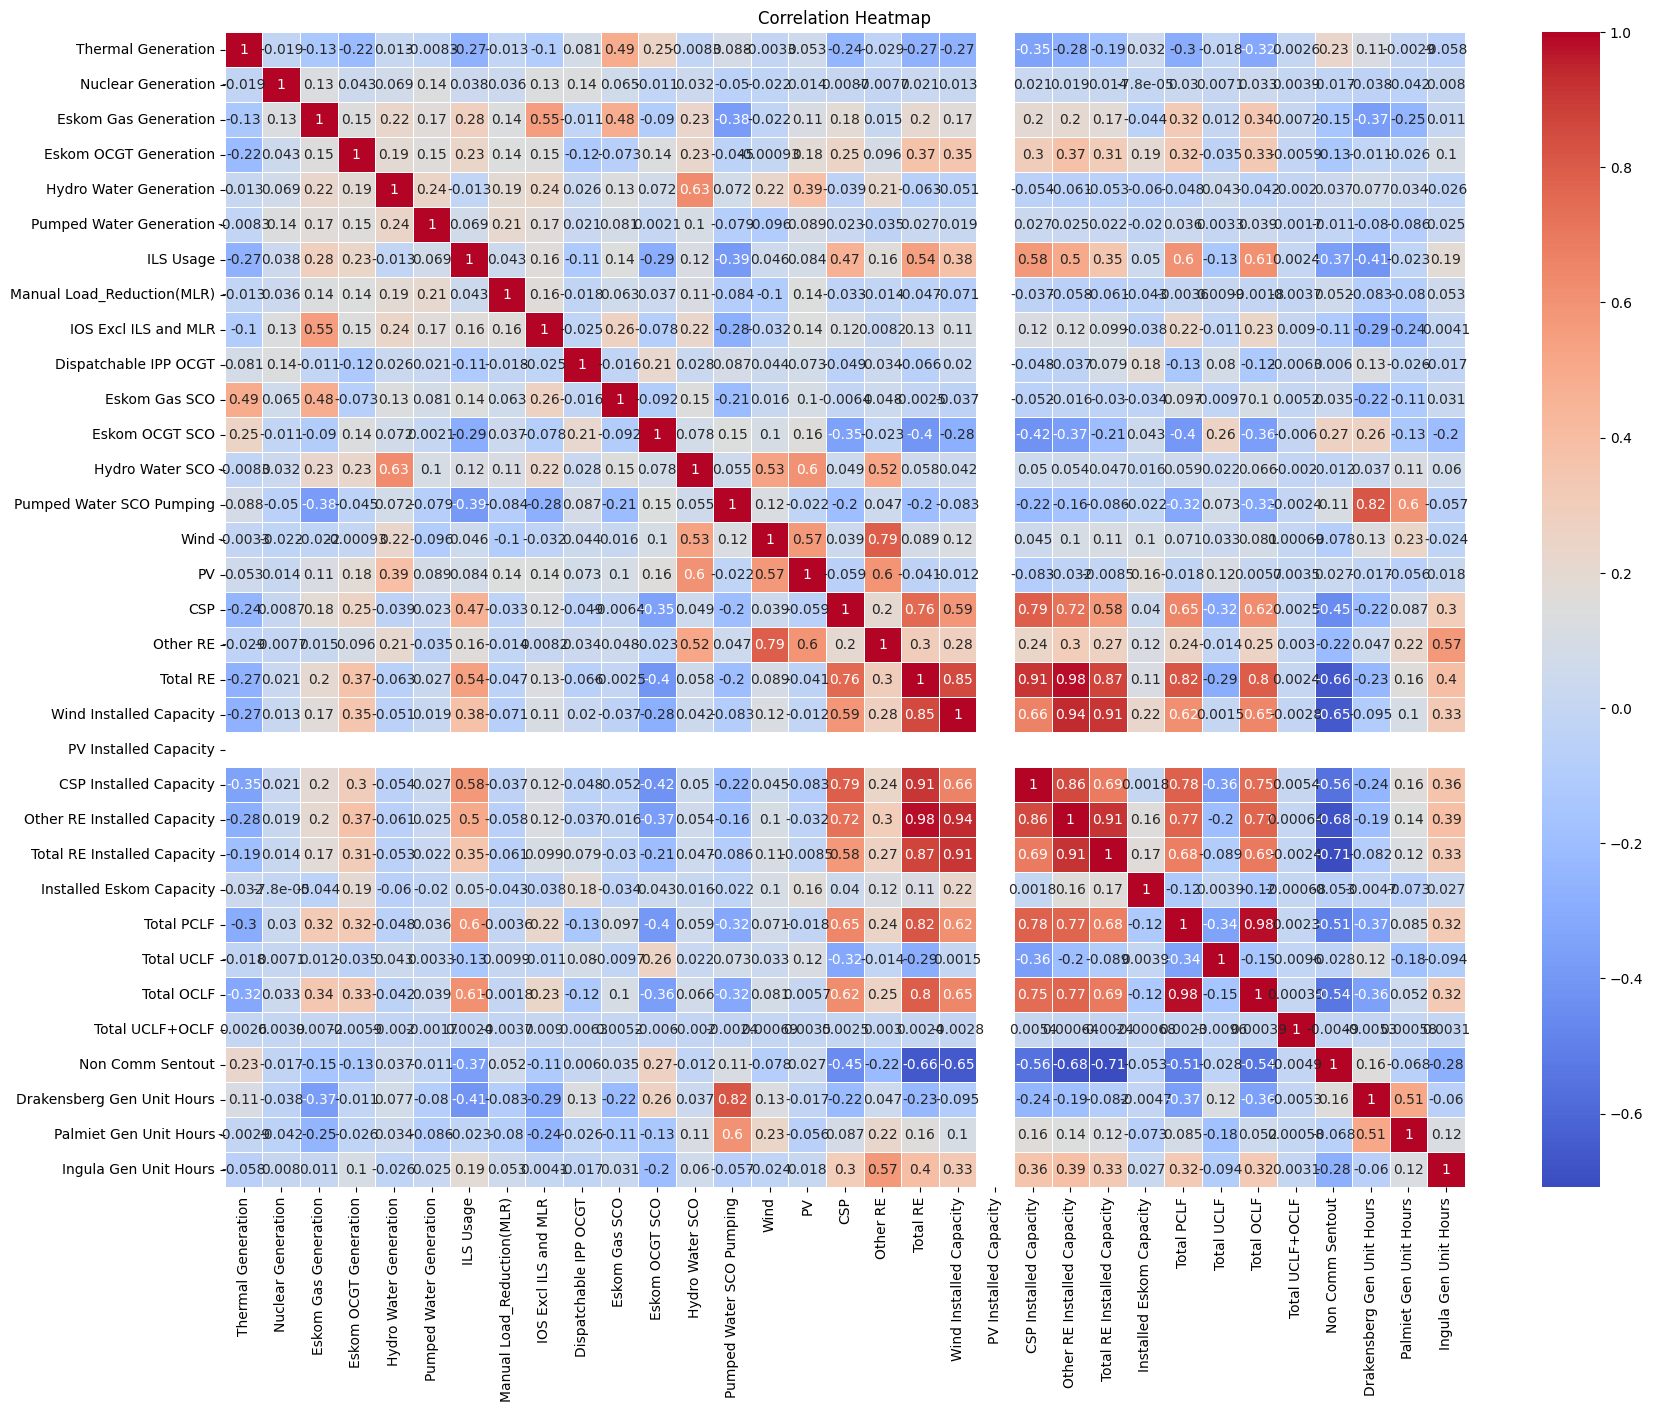

In [215]:
correlation_matrix = supply_data.corr()
plt.figure(figsize=(20, 15))  # Set the size of the heatmap

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")  # Set the title of the heatmap

plt.show()  # Display the heatmap
